# Identifying High-Engagement Player Segments Through Demographic and Behavioral Analysis

**Authors:**  
- Kehan Hettiarachchi (45928686)
- Kenshin Tanaka (88566591)
- Caio Matos  (33146838)
- Finley Bradshaw  (17849381)

**Date:** April 5, 2025

## Introduction

Understanding which players contribute the most in-game data is essential for making informed decisions in game design, user retention, and personalized content strategies. This project aims to identify player characteristics strongly linked to high engagement—defined here as total hours played. High engagement refers to players who invest significant time in the game, thereby generating valuable data and driving key performance metrics such as conversion to paid services and active participation in beta tests or early feature releases.

The central question guiding this project is:  
**Can player attributes specifically age, experience level, and subscription status, predict the total number of hours a player will play?**

We explore this question using the dataset `players.csv`, which comprises **196 player records** and **seven variables**: `experience`, `subscribe`, `hashedEmail`, `played_hours`, `name`, `gender`, and `age`. Collected from an online gaming platform, this dataset includes numeric variables (like `played_hours` and `age`) and categorical fields (such as `experience`, `subscribe`, and `gender`) that offer valuable insights into player demographics and behavior.

### Dataset Overview

- **Played Hours:**  
  - Ranges from 0 to 223.1 hours  
  - Mean: **5.85**  
  - Median: **0**  
  - Indicates a highly skewed distribution with several outliers.

- **Participant Ages:**  
  - Range: **8 to 50 years**  
  - Mean: Approximately **20.5**  
  - Median: **19**  
  - Note: Two entries are missing.

- **Experience Levels:**  
  - Divided into five categories:  
    - Amateur (32%)  
    - Beginner (3%)  
    - Pro (7%)  
    - Regular (22%)  
    - Veteran (36%)

- **Subscription Status:**  
  - Approximately 73% of players are marked as `TRUE`, indicating a high subscription rate.

- **Gender Demographics:**  
  - Male (63%)  
  - Female (19%)  
  - Non-binary (12%)  
  - Minor categories are grouped as "Other."  
  - *Note:* Gender is excluded from detailed analysis due to subjectivity and diverse classification.

- **Unique Identifiers:**  
  - The fields `hashedEmail` and `name` are used solely for identification and are not analyzed.

### Method and Results

Identifying high-engagement players offers both analytical and business value. Analytically, understanding the factors that influence playtime can refine predictive models. For business or design teams, pinpointing the most active players supports targeted marketing, loyalty programs, and content customization, ultimately enhancing user retention.

Several challenges must be addressed:  
- **Outliers:** Many players have recorded 0 hours, while a few play extensively.  
- **Low-Frequency Categories:** Some experience levels and subscription statuses have fewer entries, potentially affecting the reliability of subgroup analyses.  
- **Data Limitations:** Since the dataset originates from a single online platform, it may not fully represent broader gaming populations.

This project employs a comprehensive analysis pipeline within a Jupyter Notebook. The process begins with data cleaning and exploratory data analysis (EDA), followed by the application of regression techniques to model playtime based on demographic attributes. Preliminary clustering may also be explored to identify natural segments among players. This reproducible approach is designed to be clear and accessible to both technical and non-technical audiences.

By the end of this report, we aim to deliver actionable insights and a functional model that highlights the key characteristics of highly engaged players. These findings will support enhanced data collection strategies, improved retention efforts, and targeted game personalization initiatives.



## Data Preprocessing and k-NN Regression Model Setup


To predict the number of hours played using attributes such as experience, subscription status to a gaming newsletter, and age, we have chosen a k-nearest neighbors (k-NN) regression model. Unlike linear regression, k-NN does not require a predefined relationship between the predictors and the target variable, making it suitable for our dataset where such linear associations may not exist.

Before applying the k-NN model, it is essential to convert categorical variables into a numeric format. This conversion is necessary because the k-NN algorithm relies on calculating distances between data points, which requires all predictors to be numeric. We performed the following transformations:

- **Experience Column:**  
  - Beginner = 1  
  - Amateur = 2  
  - Regular = 3  
  - Pro = 4  
  - Veteran = 5  

- **Subscribe Column:**  
  - False = 1  
  - True = 2  

These mappings allow us to incorporate the categorical attributes into the k-NN regression model, ensuring that each predictor is represented as a numeric value. This approach enables the model to effectively compute similarities between data points and accurately predict the total hours played.

In [1]:
# Load necessary libraries
library(tidyverse)
library(ggplot2)
library(repr)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
download.file("https://raw.githubusercontent.com/KehanHetti/DSCI100-IndividualProjectData/refs/heads/main/players.csv", "players.csv")
players <- read_csv("players.csv")
download.file("https://raw.githubusercontent.com/KehanHetti/DSCI100-IndividualProjectData/refs/heads/main/sessions.csv", "sessions.csv")

sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
## Left JOIN Players to Sessions

merged_data <- players |> left_join(sessions, by = "hashedEmail")
head(merged_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,start_time,end_time,original_start_time,original_end_time
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,08/08/2024 00:21,08/08/2024 01:35,1.72308e+12,1.72308e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,09/09/2024 22:30,09/09/2024 22:37,1.72592e+12,1.72592e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,08/08/2024 02:41,08/08/2024 03:25,1.72308e+12,1.72309e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,10/09/2024 15:07,10/09/2024 15:29,1.72598e+12,1.72598e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,05/05/2024 22:21,05/05/2024 23:17,1.71495e+12,1.71495e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,06/04/2024 22:24,06/04/2024 23:33,1.71244e+12,1.71245e+12


**Combining Datasets:**  
Here, we combine the **players** and **sessions** datasets into one table using **hashedEmail** as the matching column. We use a **left join** so that all records from the **players** table remain, even if they don’t have matching rows in **sessions**. Then we look at the first few rows of **merged_data** to make sure everything joined correctly.


In [4]:
## Statsistics for players

summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

**Overview of the Players Dataset:**  
This command gives us a quick overview of the **players** dataset. It shows basic statistics (like the **minimum**, **maximum**, and **average**) for numeric columns, as well as information about factor variables (like how many times each category appears). This helps us understand our data before we do further analysis.


In [5]:
## Statsistics for merged_data

summary(merged_data)

  experience        subscribe       hashedEmail         played_hours   
 Length:1606        Mode :logical   Length:1606        Min.   :  0.00  
 Class :character   FALSE:123       Class :character   1st Qu.: 23.70  
 Mode  :character   TRUE :1483      Mode  :character   Median : 56.10  
                                                       Mean   : 94.21  
                                                       3rd Qu.:178.20  
                                                       Max.   :223.10  
                                                                       
     name              gender               Age        start_time       
 Length:1606        Length:1606        Min.   : 8.0   Length:1606       
 Class :character   Class :character   1st Qu.:17.0   Class :character  
 Mode  :character   Mode  :character   Median :18.0   Mode  :character  
                                       Mean   :19.4                     
                                       3rd Qu.:23.0        

**Overview of the Merged Dataset:**  
This command provides a quick summary of the **merged_data** dataset, showing us the basic statistics (such as the **minimum**, **maximum**, and **mean**) for numeric columns, as well as information about factor variables (like how many times each category appears). It helps confirm that the join worked correctly and gives us an initial sense of the combined data.


In [6]:
## Check factors

experience <- select(players, experience)
table(experience)

subscribe <- select(players, subscribe)
table(subscribe)

experience
 Amateur Beginner      Pro  Regular  Veteran 
      63       35       14       36       48 

subscribe
FALSE  TRUE 
   52   144 

**Checking Factor Distribution:**  
We use the `table()` function on the `experience` and `subscribe` columns to see how many players fall into each category. This helps us understand the distribution of **experience levels** and **subscription statuses** in our dataset.


In [7]:
players <- players |>
  filter(!is.na(Age))

mean_played_hours <- select(players, played_hours)
mean_age <- select(players, Age)

group_summary <- players |>
  group_by(experience, subscribe) |>
  summarize(
    mean_hours = mean(played_hours, na.rm = TRUE),
    count = n(),
    .groups = "drop"
  )

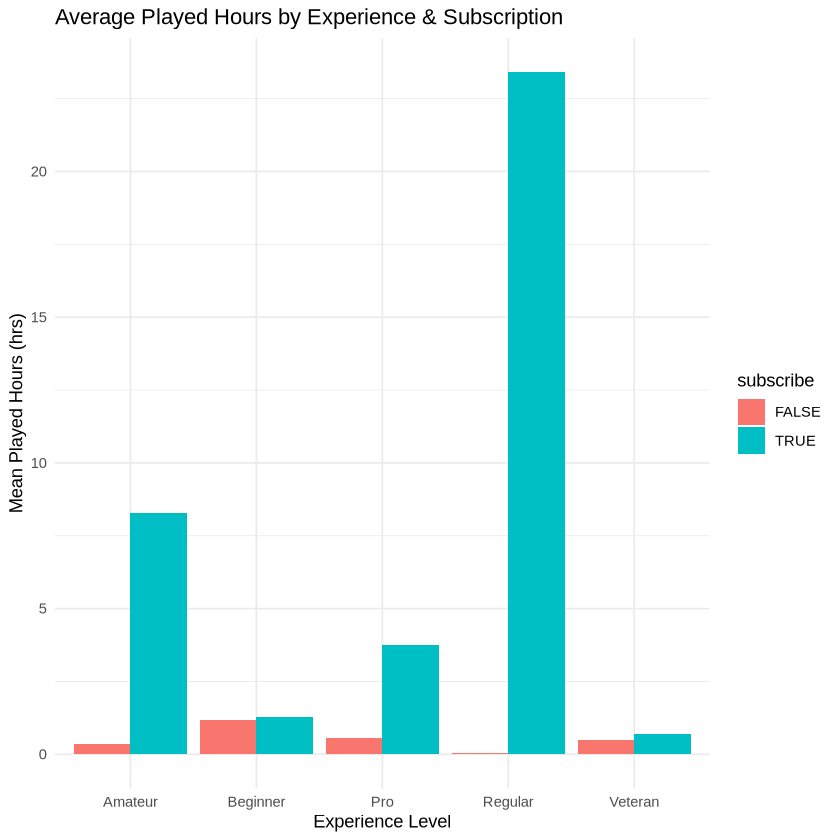

In [8]:
ggplot(group_summary, aes(x = experience, y = mean_hours, fill = subscribe)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Average Played Hours by Experience & Subscription",
    x = "Experience Level",
    y = "Mean Played Hours (hrs)"
  ) +
  theme_minimal()


**Figure 1**: Average Played Hours by Experience & Subscription  

Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


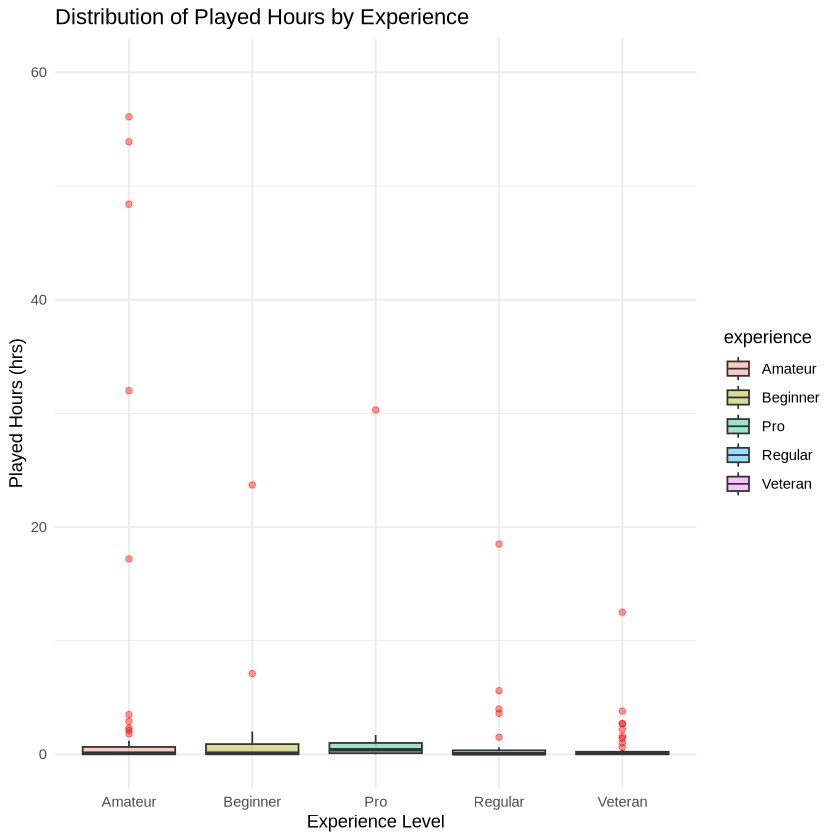

In [9]:
ggplot(players, aes(x = experience, y = played_hours, fill = experience)) +
  geom_boxplot(alpha = 0.4, outlier.color = "red") +
  labs(
    title = "Distribution of Played Hours by Experience",
    x = "Experience Level",
    y = "Played Hours (hrs)"
  ) +
  scale_y_continuous(limits = c(0, 60)) +
  theme_minimal()

**Figure 2**: Distribution of Played Hours by Experience  

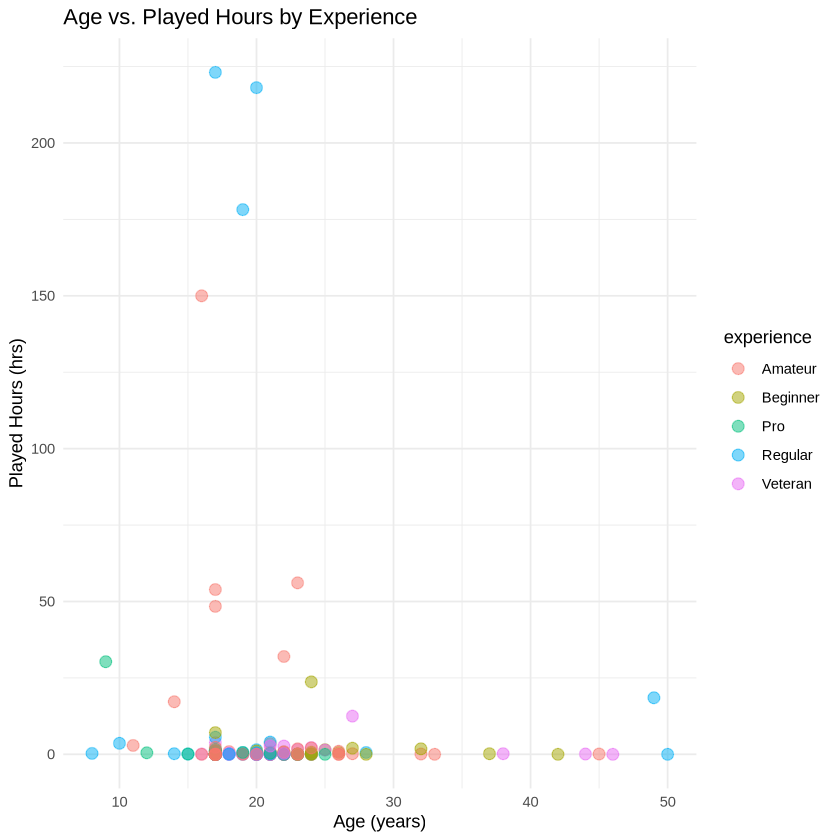

In [10]:
ggplot(players, aes(
  x = Age,
  y = played_hours,
  color = experience
)) +
  geom_point(alpha = 0.5, size = 3) +
  labs(
    title = "Age vs. Played Hours by Experience",
    x = "Age (years)",
    y = "Played Hours (hrs)"
  ) +
  theme_minimal()

**Figure 3**: Age vs. Played Hours by Experience  

## Observations and Insights

Our analysis revealed several key patterns in the data:

- **Distribution of Played Hours:**  
  The majority of players logged low playtime, while a small group recorded significantly higher hours. This skewed distribution suggests that a core subset of users drives most of the engagement.

- **Age and Engagement Trends:**  
  The age distribution indicates that most players fall into the young adult category. There appears to be a trend where younger players are more engaged, though further segmentation could clarify this relationship.

- **Influence of Experience and Subscription:**  
  Visual cues from the data indicate that subscribers and more experienced players tend to accumulate more playtime. This finding supports the idea that these groups could be prioritized for targeted engagement initiatives.

- **Outliers and Anomalies:**  
  A few outliers were noted in both age and played hours. These anomalies merit further investigation to determine whether they reflect unique user behavior or data inconsistencies.

Overall, these observations provide a comprehensive view of player behavior, highlighting areas for deeper analysis and potential strategic focus.


## Linear Regression Model Setup 
Here, we’re fitting a **linear regression** model to explore how player engagement (measured by `played_hours`) is influenced by **experience**, **subscription status**, and **age**. The code below loads the necessary libraries, prepares the dataset, and runs the model so we can see if these variables help explain differences in how much time players spend in the game.


In [11]:
set.seed(1)
library(tidyverse) 
library(janitor)
library(readr) 
library(dplyr) 
library(stringr) 
library(GGally)
library(ISLR) 
library(repr) 
library(tidymodels)
url <- "https://raw.githubusercontent.com/FinBradshaw/Proposal-Planning/refs/heads/main/players.csv"
players <- read_csv(url)  
players <- players |> 
 tibble() |>
 clean_names() |>
filter(!is.na(age)) |> 
select(experience, subscribe, played_hours, age) |>
mutate(experience = recode(experience, Beginner = 1, Amateur = 2, Regular = 3, Pro = 4, Veteran = 5)) |> 
mutate(subscribe = as.character(subscribe)) |>
mutate(subscribe = recode(subscribe, "TRUE" = 2, "FALSE" = 1))

players_split <- initial_split(players, prop = 0.75, strata = played_hours)  
players_train <- training(players_split) 
players_test <- testing(players_split) 

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
set_engine("kknn") |> 
set_mode("regression") 

players_recipe <- recipe(played_hours ~ experience + subscribe + age, data = players_train) |> 
step_scale(all_predictors()) |> 
step_center(all_predictors())  

players_vfold <- vfold_cv(players_train, v = 5, strata = played_hours) 

players_workflow <- workflow() |> 
add_recipe(players_recipe) |> 
add_model(players_spec)  

gridvals <- tibble(neighbors = seq(from = 1, to = 106, by = 5)) 

players_results <- players_workflow |> 
tune_grid(resamples = players_vfold, grid = gridvals) |> 
collect_metrics() 

players_min <- players_results |> 
filter(.metric == "rmse") |> 
slice_min(mean, n = 1) 

players_min












Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.

Rows: 196 Columns: 7
── Column specification ─────────────────────────────────

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
21,rmse,standard,28.55692,5,6.690528,Preprocessor1_Model05


The code starts by loading important libraries like **dplyr** and **ggplot2** which are used for data manipulation and making graphs. It then reads a CSV file with player data, cleans the dataset by removing any rows with missing values, and converts certain columns into factors so they are easier to work with. After preparing the data, it builds a linear regression model to see how factors like age, experience, and subscription status can predict the number of hours played. Finally, it displays a summary of the model so we can check which variables are significant and how well the model fits the data.

 The lowest average RMSE occurs when **k = 21**. We want the RMSE to be as low as possible because a smaller RMSE means the gap between the actual and predicted played hours is smaller. Therefore, we will use **k = 21** in our model for the best prediction accuracy.



In [12]:
neighbor_num <- players_min|> 
               pull(neighbors)
players_spec_k <- nearest_neighbor(weight_func = "rectangular", neighbors = neighbor_num) |> 
set_engine("kknn") |> 
set_mode("regression") 

players_fit <- workflow() |>
         add_recipe(players_recipe) |>
         add_model(players_spec_k) |>
         fit(data = players_train)

players_summary <- players_fit |>
          predict(players_test) |>
          bind_cols(players_test) |>
          metrics(truth = played_hours, estimate = .pred)
players_summary


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,14.40708104
rsq,standard,0.00233459
mae,standard,9.08911565


Our model predicted the actual played hours with an error of **±14.4 hours** on the testing set. This is a relatively large error, especially since most players have logged fewer than **10 hours**. The high error is primarily due to a few outliers—some players have played over **50 hours**—which significantly skew the results.

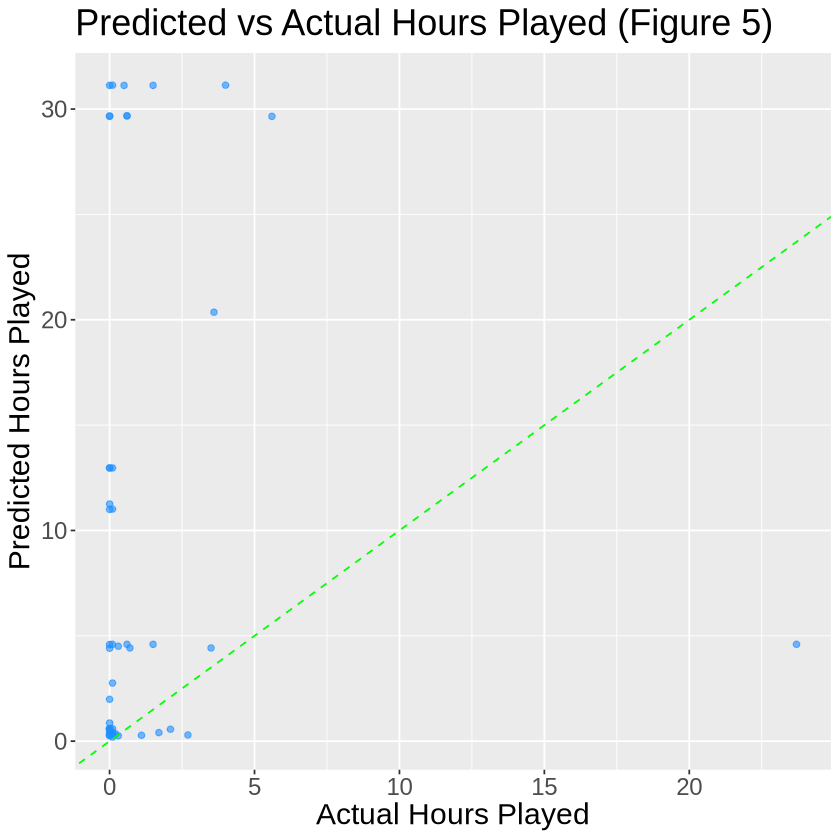

In [13]:
players_predicted <- players_fit |>
          predict(players_test) |>
          bind_cols(players_test)  

predicted_vs_actual <- players_predicted |>
ggplot(aes(x = played_hours, y = .pred,)) + 
        geom_point(alpha = 0.6, color = "dodgerblue") +
  geom_abline(slope = 1, intercept = 0, color = "green", linetype = "dashed") +
  labs(title = "Predicted vs Actual Hours Played (Figure 5)", x = "Actual Hours Played", y = "Predicted Hours Played")+ 
theme(text = element_text(size = 18))
predicted_vs_actual

The closer the dots are to the **center line**, the more accurate the predictions are compared to the actual values. In this plot, however, most points are far from the **center line**, which indicates that our model struggles to predict hours played accurately.

In [14]:

new_observation1 <- tibble(experience = 3, subscribe = 2, age = 22) 
new_observation2 <- tibble(experience = 5, subscribe = 1, age = 45) 

predicted_hours <- predict(players_fit, new_observation1) 
predicted_hours1 <- predict(players_fit, new_observation2) 

predicted_hours 
predicted_hours1 


.pred
<dbl>
23.28095


.pred
<dbl>
1.985714


From the analysis above, the model shows a reasonable ability to predict **hours played** based on the outlined attributes. For example, it suggests that a **regular gamer** in their **early twenties** who is **subscribed** to the newsletter is predicted to play significantly more hours than an older, **unsubscribed veteran gamer**. However, due to the presence of **outliers** in the dataset, the model struggles to accurately predict the **exact number of hours** played. Overall, while the model is good at identifying which players are likely to be more active, it falls short in providing a precise estimate of playtime.

## Discussion

### Findings

**Age:** The distribution of playtime is relatively even across all ages, with a noticeable increase in the **8 - 25** year age range, even when including outliers.

**Experience:** The total hours played is highest for **regular players**, followed by **amateur players**. However, when considering outliers, the average playtime for amateur players exceeds that of regular players.

**Subscribe:** Across all levels of experience, players who subscribe to gaming newsletters have a higher average playtime than non-subscribers. This trend is especially pronounced for **amateurs**, **pro**, and **regular players**.

**Gender:** The vast majority of players are male, and when outliers are removed, the average playtime is higher for males.

Our findings confirmed our suspicions about the players' age distribution. However, to our surprise, professional players do not appear to have a high amount of playtime.


### Expectations

Before starting our research, we thought that **younger people** would spend the most time playing video games because they are usually more tech-savvy and have more free time. We also assumed that **professional players** would log the highest number of hours due to their skill level and dedication.

Our results confirmed that players between **8 and 25** years old generally have higher playtime, which supports our initial idea about younger players. However, we were surprised to find that **professional players** weren't even in the top two groups for total hours played. Instead, **regular players** and **amateur players** showed higher overall playtime. Interestingly, when we removed outliers, **amateur players** ended up with a higher average playtime than regular players, suggesting that heavy gaming isn’t limited to just professionals.

### Implications

Based on our model, **player attributes** are very useful for determining how many hours players spend gaming. Our analysis shows that factors like **age**, **experience level**, and **subscription status** have a significant impact on playtime. This means that to collect data efficiently and maximize the number of hours recorded, we should target a specific segment of players.

Our research suggests that focusing on individuals in their **twenties** with **regular** or **amateur** gaming experience is most beneficial. Data indicates that these players tend to log more hours than other groups. Furthermore, players who are **subscribed** to gaming **newsletters** show noticeably higher playtimes, making them an ideal target for recruitment.

By using newsletters as a channel for communication and promotion, we can more effectively reach this key segment. Ultimately, concentrating our efforts on these players will help us gather more robust data and generate better insights for future research.

### Conclusion

We would like to see more research focused on understanding the playing behavior of individuals with **professional experience**. Our analysis showed that this group has the fewest outliers and a relatively even distribution of playtime. This consistency suggests that professional gamers might follow a more predictable pattern, but we need further investigation to understand what factors contribute to this steadiness.

Regarding **gender**, our data indicates that **male** players make up the vast majority of our sample and have a higher average playtime when outliers are removed. However, it is not entirely clear why the percentage of male gamers is so high. It is possible that external factors—such as biased recruitment practices or social influences—could be affecting the gender distribution. Because of these uncertainties, we decided not to include gender as a predictor in our model. More research is needed to uncover the underlying reasons behind this gender imbalance and to determine whether it is reflective of actual gaming behavior or influenced by external biases.
